<a href="https://colab.research.google.com/github/VitorK61/Curso_de_Exetens-o_Analise_de_dados_em_python_pandas/blob/main/Analise_de_dados_em_Python_Pandas_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Manipulação de dados usando Python Pandas**

**PARTE 2 - Inserção, remoção de colunas, *merge* e gráficos**

Professor: Henrique Poyatos

Aluno: Vitor Knabben

Data: 9 e 10 de fevereiro de 2023

In [25]:
# Importando bibliotecas pandas no Python;

import pandas as pd

combustiveis_df = pd.read_excel("ca-2021-02.xlsx")

In [26]:
# Inserção simples de dado

combustiveis_df['Ativo'] = True

display(combustiveis_df.head())

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira,Ativo
0,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,GASOLINA,2021-11-01,6.799,NaN,R$ / litro,VIBRA ENERGIA,True
1,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,ETANOL,2021-11-01,5.299,NaN,R$ / litro,VIBRA ENERGIA,True
2,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,DIESEL,2021-11-01,5.549,NaN,R$ / litro,VIBRA ENERGIA,True
3,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,GASOLINA ADITIVADA,2021-11-01,6.899,NaN,R$ / litro,VIBRA ENERGIA,True
4,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,DIESEL S10,2021-11-01,5.649,NaN,R$ / litro,VIBRA ENERGIA,True


In [27]:
# Criar um coluna "Obs" que tenha nela escrito "MELHOR CIDADE" quando a coluna Municipio for igual a São Paulo

combustiveis_df['Obs'] = ["MELHOR CIDADE" if municipio == 'SAO PAULO' else None for municipio in combustiveis_df['Municipio']]

# O grafico demonstraram apenas linhas com os Municipios "SAO PAUlO" "INDAIATUBA", "CAMPINAS", "SALTO". Demonstrando a funcionalidade da nova coluna "Obs" manifestando "MELHOR CIDADE" ao detectar o "Municipio" "SAO PAULO" 

display(combustiveis_df.loc[combustiveis_df['Municipio'].isin(['SAO PAULO','INDAIATUBA', 'CAMPINAS', 'SALTO']), ['Municipio', 'Obs']])

,Municipio,Obs
1601,SAO PAULO,MELHOR CIDADE
1602,SAO PAULO,MELHOR CIDADE
1603,SAO PAULO,MELHOR CIDADE
1604,SAO PAULO,MELHOR CIDADE
2607,CAMPINAS,None
...,...,...
165925,SAO PAULO,MELHOR CIDADE
165926,SAO PAULO,MELHOR CIDADE
166122,SAO PAULO,MELHOR CIDADE
166123,SAO PAULO,MELHOR CIDADE


In [28]:
# Preenchimento de coluna (Valor de Venda - Status)
# if preço > 6.5 = Caro | elif preço < 6.5 = Barato

# Usando a biblioteca Python NumPy 
import numpy as np

combustiveis_df['Status do Valor de Venda'] = np.where(combustiveis_df['Valor de Venda'] > 6.5, 'Caro', 'Barato')
display(combustiveis_df[['Revenda', 'Valor de Venda', 'Status do Valor de Venda']])

,Revenda,Valor de Venda,Status do Valor de Venda
0,POSTO ARAPIRACA LTDA,6.799,Caro
1,POSTO ARAPIRACA LTDA,5.299,Barato
2,POSTO ARAPIRACA LTDA,5.549,Barato
3,POSTO ARAPIRACA LTDA,6.899,Caro
4,POSTO ARAPIRACA LTDA,5.649,Barato
...,...,...,...
168404,COMERCIAL DE COMBUSTIVEL CACHOEIRINHA LTDA,5.859,Barato
168405,ABC DISTRIBUICAO DE PETROLEO LTDA,6.580,Caro
168406,ABC DISTRIBUICAO DE PETROLEO LTDA,4.740,Barato
168407,ABC DISTRIBUICAO DE PETROLEO LTDA,5.448,Barato


In [29]:
# Calcular postos de gasolina por habitantes que possui a amostragem de combustiveis nov/2021

num_habitantes_df = pd.read_csv("ibge_num_habitantes_estimado.csv", sep=";")
num_habitantes_df.rename(columns={"Estado":"Estado - Sigla"}, inplace=True)
display(num_habitantes_df)

,Municipio,Estado - Sigla,NumHabitantes2021
0,BELO HORIZONTE,MG,2530701
1,CAMPINAS,SP,1223237
2,CAMPO GRANDE,MS,916001
3,CURITIBA,PR,1963726
4,GOIANIA,GO,1555626
5,INDAIATUBA,SP,260690
6,NATAL,RN,803739
7,PALMAS,TO,313349
8,PENAPOLIS,SP,64098
9,PORTO ALEGRE,RS,1492530


In [30]:
# merge entre os dois Dataframes, combustiveis_df e num_habitante

colunas = ['Municipio', 'Estado - Sigla']
merge_df = combustiveis_df.merge(num_habitantes_df, how="inner", on=colunas)
display(merge_df)
print(merge_df.info())

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira,Ativo,Obs,Status do Valor de Venda,NumHabitantes2021
0,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854,QUADRA08 LOTE 11E,SETOR NEGRAO DE LIMA,74650-300,GASOLINA,2021-11-01,6.999,NaN,R$ / litro,RAIZEN,True,None,Caro,1555626
1,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854,QUADRA08 LOTE 11E,SETOR NEGRAO DE LIMA,74650-300,ETANOL,2021-11-01,4.990,NaN,R$ / litro,RAIZEN,True,None,Barato,1555626
2,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854,QUADRA08 LOTE 11E,SETOR NEGRAO DE LIMA,74650-300,GASOLINA ADITIVADA,2021-11-01,7.130,NaN,R$ / litro,RAIZEN,True,None,Caro,1555626
3,CO,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,AVENIDA INDEPENDENCIA,2.908,NaN,VILA NOVA,74645-010,GASOLINA,2021-11-01,6.990,NaN,R$ / litro,BRANCA,True,None,Caro,1555626
4,CO,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,AVENIDA INDEPENDENCIA,2.908,NaN,VILA NOVA,74645-010,ETANOL,2021-11-01,4.990,NaN,R$ / litro,BRANCA,True,None,Barato,1555626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20629,SE,SP,INDAIATUBA,POSTO DOS ESTEVES LTDA,20.763.169/0001-00,AVENIDA ITORORO,160,NaN,CENTRO,13330-055,GASOLINA,2021-12-28,6.499,NaN,R$ / litro,IPIRANGA,True,None,Barato,260690
20630,SE,SP,INDAIATUBA,ABDELNOR VI COMERCIO DE COMBUSTIVEIS LTDA,30.253.289/0001-11,AVENIDA PRESIDENTE KENNEDY,496,NaN,CIDADE NOVA I,13334-170,DIESEL S10,2021-12-28,5.499,NaN,R$ / litro,RAIZEN,True,None,Barato,260690
20631,SE,SP,INDAIATUBA,ABDELNOR VI COMERCIO DE COMBUSTIVEIS LTDA,30.253.289/0001-11,AVENIDA PRESIDENTE KENNEDY,496,NaN,CIDADE NOVA I,13334-170,GASOLINA ADITIVADA,2021-12-28,6.699,NaN,R$ / litro,RAIZEN,True,None,Caro,260690
20632,SE,SP,INDAIATUBA,ABDELNOR VI COMERCIO DE COMBUSTIVEIS LTDA,30.253.289/0001-11,AVENIDA PRESIDENTE KENNEDY,496,NaN,CIDADE NOVA I,13334-170,ETANOL,2021-12-28,4.899,NaN,R$ / litro,RAIZEN,True,None,Barato,260690


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20634 entries, 0 to 20633
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Regiao - Sigla            20634 non-null  object        
 1   Estado - Sigla            20634 non-null  object        
 2   Municipio                 20634 non-null  object        
 3   Revenda                   20634 non-null  object        
 4   CNPJ da Revenda           20634 non-null  object        
 5   Nome da Rua               20634 non-null  object        
 6   Numero Rua                20634 non-null  object        
 7   Complemento               3837 non-null   object        
 8   Bairro                    20634 non-null  object        
 9   Cep                       20634 non-null  object        
 10  Produto                   20634 non-null  object        
 11  Data da Coleta            20634 non-null  datetime64[ns]
 12  Valor de Venda    

In [31]:
colunas=['Regiao - Sigla', 'Nome da Rua', 'Numero Rua', 
         'Bairro', 'Cep', 'Produto', 'Data da Coleta', 'Valor de Venda',
         'Unidade de Medida', 'Bandeira', 'Ativo', 'Status do Valor de Venda']
merge_df.drop(labels=colunas, axis=1, inplace=True)
print(merge_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20634 entries, 0 to 20633
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Estado - Sigla     20634 non-null  object 
 1   Municipio          20634 non-null  object 
 2   Revenda            20634 non-null  object 
 3   CNPJ da Revenda    20634 non-null  object 
 4   Complemento        3837 non-null   object 
 5   Valor de Compra    0 non-null      float64
 6   Obs                5220 non-null   object 
 7   NumHabitantes2021  20634 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 1.4+ MB
None


In [32]:
# Removendo Linhas Duplicadas

merge_df.drop_duplicates(inplace=True)
display(merge_df.head(100))

,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Complemento,Valor de Compra,Obs,NumHabitantes2021
0,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,QUADRA08 LOTE 11E,NaN,None,1555626
3,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,NaN,NaN,None,1555626
7,GO,GOIANIA,POSTO DN LTDA,05.413.136/0001-47,QD. 47 - LT. 01A,NaN,None,1555626
11,GO,GOIANIA,POSTO ALDEIA LTDA,04.896.662/0001-42,NaN,NaN,None,1555626
15,GO,GOIANIA,AUTO POSTO SANTA LUZIA LTDA,04.142.631/0001-04,NaN,NaN,None,1555626
...,...,...,...,...,...,...,...,...
1677,RJ,RIO DE JANEIRO,POSTO SANTA CLARA DA PAVUNA II LTDA,06.955.648/0001-06,NaN,NaN,None,6775561
1682,RJ,RIO DE JANEIRO,POSTO SANTA CLARA DA PAVUNA LTDA,03.246.347/0001-07,NaN,NaN,None,6775561
1688,RJ,RIO DE JANEIRO,NOVA PARADINHA AUTO POSTO LTDA,07.594.094/0001-13,31 E 45,NaN,None,6775561
1694,RJ,RIO DE JANEIRO,AUTO POSTO LUAR DA PENHA LTDA.,07.035.006/0001-43,L.A. PAL 24008,NaN,None,6775561


In [33]:
#Agrupar e contar quantos postos tem na cidade..

postos_por_municipio_df = merge_df.groupby(by=['Estado - Sigla', 'Municipio', 'NumHabitantes2021']).count()

postos_por_municipio_df.reset_index(inplace=True)

#display(postos_por_municipio_df.info())

postos_por_municipio_df.drop('CNPJ da Revenda', axis=1, inplace=True)

postos_por_municipio_df.rename(columns={"Revenda": "NumPostos"}, inplace=True)

postos_por_municipio_df['NumHabitantesPorPosto'] = postos_por_municipio_df['NumHabitantes2021'] / postos_por_municipio_df['NumPostos']

#display(postos_por_municipio_df.info())

display(postos_por_municipio_df)

,Estado - Sigla,Municipio,NumHabitantes2021,NumPostos,Complemento,Valor de Compra,Obs,NumHabitantesPorPosto
0,AC,RIO BRANCO,419452,44,8,0,0,9533.000000
1,GO,GOIANIA,1555626,93,74,0,0,16727.161290
2,MG,BELO HORIZONTE,2530701,54,1,0,0,46864.833333
3,MS,CAMPO GRANDE,916001,104,12,0,0,8807.701923
4,PR,CURITIBA,1963726,110,11,0,0,17852.054545
5,RJ,RIO DE JANEIRO,6775561,379,58,0,0,17877.469657
6,RN,NATAL,803739,37,10,0,0,21722.675676
7,RO,PORTO VELHO,548952,40,1,0,0,13723.800000
8,RS,PORTO ALEGRE,1492530,73,5,0,0,20445.616438
9,SP,CAMPINAS,1223237,51,9,0,0,23985.039216


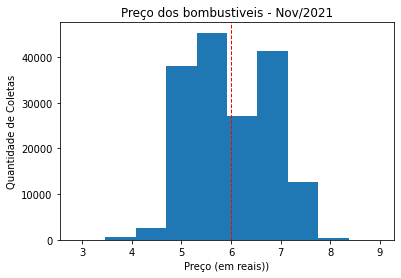

In [34]:
# Matplotlib e construção de gráficos

import matplotlib.pyplot as plt

plt.hist(combustiveis_df['Valor de Venda'])

# titulo no grafico

plt.title("Preço dos bombustiveis - Nov/2021")

# Rótulo Horizontal e Vertical

plt.xlabel("Preço (em reais))")

plt.ylabel("Quantidade de Coletas")

# Traçando a linha vermelha tracejada com o preço médio

plt.axvline(combustiveis_df['Valor de Venda'].mean(), color="red", linestyle="dashed", linewidth=1)

# Plot

plt.show()

In [35]:
# Outro Exemplo de gráfico

c_mean = combustiveis_df['Valor de Venda'].groupby(by=combustiveis_df['Produto']).mean()
display(c_mean)

Produto
DIESEL                5.375682
DIESEL S10            5.454901
ETANOL                5.456115
GASOLINA              6.708741
GASOLINA ADITIVADA    6.860422
GNV                   4.392935
Name: Valor de Venda, dtype: float64

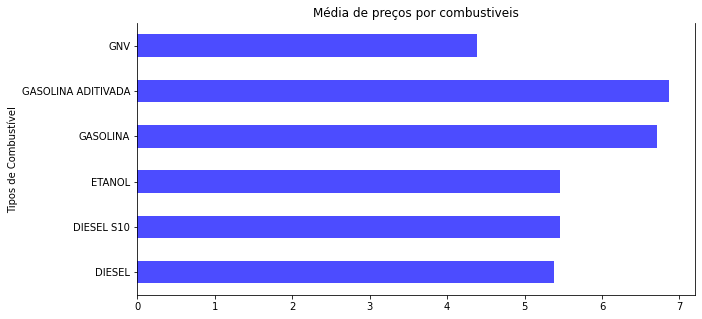

In [36]:
import seaborn as sns

# Area do grafico
plt.figure(figsize=(10, 5))

# Plot
c_mean.plot(
    kind="barh", 
    xlabel="Tipos de Combustível",
    ylabel="Preço reais/litro",
    title="Média de preços por combustiveis",
    color="blue",
    alpha=0.7
)

# Grid
# plt.grid()

# Removendo Verticais ou Horizontais
sns.despine(right=False, bottom=False)

# Exibição
plt.show()

In [37]:
#c_mean.reset_index(inplace=True)
display(c_mean)

excel = "por_litro.xlsx"
c_mean.to_excel(excel, "Sumário")

Produto
DIESEL                5.375682
DIESEL S10            5.454901
ETANOL                5.456115
GASOLINA              6.708741
GASOLINA ADITIVADA    6.860422
GNV                   4.392935
Name: Valor de Venda, dtype: float64

In [38]:
# Personalizando a planilha Excel

from openpyxl import load_workbook
from openpyxl.styles import PatternFill, Font, Color, Alignment

# Abrindo o Excel no openpyxl
wb = load_workbook(excel) # wb = Workbook

# Pegando a planilha correta usando Sheet Name (Nome da planilha)
ws = wb['Sumário'] # Work Sheet - Planilha ativa ou de trabalho

# Pintando o cabeçalho da tabela
tabe_cor = PatternFill('solid', fgColor='808080')
coords = ["A1", "B1"]
for coord in coords:
  ws[coord].fill = tabe_cor

# Aplicando red/bold aos preços de combustiveis >= a 6,5 reais
MAX_ROW = ws.max_row
num_linha = 2
while num_linha <= MAX_ROW:
  coord = 'B' + str(num_linha) # coord="B{0}".format(num_linha)
  if ws[coord].value >= 6: 
    ws[coord].font = Font(bold=True, size=12, color="FF0000")
  num_linha += 1

# Salvando o Excel
wb.save(excel)